# 📊 Capstone Project: Time Series Forecasting of Electricity Consumption for Smart Grid Management

## 🧠 Project Theme
Build a time series model to forecast daily electricity consumption to help a power distribution company manage resources, prevent outages, and optimize energy supply.

---

## 📁 Dataset: Individual Household Electric Power Consumption Data Set

### Source:
[UCI Machine Learning Repository – Household Power Consumption Dataset](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption)

### Description:
- Measurements of electric power consumption in one household with a one-minute sampling rate over 4 years (Dec 2006 – Nov 2010).
- Features include: date, time, global active power, voltage, sub-metering values, etc.

---

## 🎯 Business Objective

As a data analyst at a utility company, your goal is to build a **time series forecasting model** that accurately predicts daily electricity demand.

Business Impact:
- Optimize electricity supply.
- Reduce cost of excess power generation.
- Support renewable integration (solar/wind) through forecasting.
- Create an executive dashboard in Tableau Public.

---

## ✅ Deliverables
1. Time Series Forecasting model in Jupyter Notebook.
2. Cleaned and processed dataset (daily level).
3. Tableau Public dashboard link.
4. Final Summary Report with business recommendations.

---


### Import Libraries

In [279]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from prophet import Prophet

from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from IPython import display

### Load and Explore the Dataset

In [282]:
 df = pd.read_csv("D:\DS & ML\PROJECT\Time series analysis\Data\household_power_consumption.txt", sep = ';')

C:\Users\User\AppData\Local\Temp\ipykernel_20372\1662626797.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\DS & ML\PROJECT\Time series analysis\Data\household_power_consumption.txt", sep = ';')


In [284]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [286]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [288]:
df.shape

(2075259, 9)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [292]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [294]:
df.duplicated().sum()

0

### Data Cleaning and Preprocessing
- Parse the `Date` and `Time` into a combined datetime column.
- Remove rows with missing or malformed data.


In [297]:
date = df['Date'] + " " + df['Time']
df['Date'] = pd.to_datetime(date, dayfirst=True)
df.drop('Time', axis=1, inplace=True)
df.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [299]:
df.tail()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [301]:
df.isnull().sum()

Date                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [303]:
df.dropna(inplace=True)

In [305]:
df.tail()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


### Resample to Daily Consumption
- Aggregate power consumption (`Global_active_power`) to daily values in kWh.


In [331]:
consumption_df = df[['Date','Global_active_power']].copy()
consumption_df.replace('?', np.nan, inplace=True)
consumption_df = consumption_df.astype({'Global_active_power': float})
consumption_df['Date'] = pd.to_datetime(consumption_df['Date'])
consumption_df.set_index('Date', inplace=True)
consumption_df = consumption_df.resample('D').sum()/60
consumption_df.columns = ['Global_active_power_kWh']
consumption_df.head()

,Global_active_power_kWh
Date,
2006-12-16,20.152933
2006-12-17,56.507667
2006-12-18,36.730433
2006-12-19,27.769900
2006-12-20,37.095800


### Create New Time Features
- Extract `Day`, `Month`, `Weekday`, and `Year` for exploratory purposes.


In [336]:
df_tab = pd.DataFrame(index=consumption_df.index)
df_tab['Year'] = consumption_df.index.year
df_tab['Month'] = consumption_df.index.month
df_tab['Day'] = consumption_df.index.day
df_tab['Weekday'] = consumption_df.index.day_name()   # Gives full name like 'Monday'
df_tab['Weekday_Num'] = consumption_df.index.weekday
df_tab['Global_active_power_kWh'] = consumption_df['Global_active_power_kWh']
df_tab

,Year,Month,Day,Weekday,Weekday_Num,Global_active_power_kWh
Date,,,,,,
2006-12-16,2006,12,16,Saturday,5,20.152933
2006-12-17,2006,12,17,Sunday,6,56.507667
2006-12-18,2006,12,18,Monday,0,36.730433
2006-12-19,2006,12,19,Tuesday,1,27.769900
2006-12-20,2006,12,20,Wednesday,2,37.095800
...,...,...,...,...,...,...
2010-11-22,2010,11,22,Monday,0,34.025600
2010-11-23,2010,11,23,Tuesday,1,26.292267
2010-11-24,2010,11,24,Wednesday,2,29.937467


### Visualize Daily Demand
- Line plot of daily electricity demand over time.
- Highlight yearly and monthly patterns.

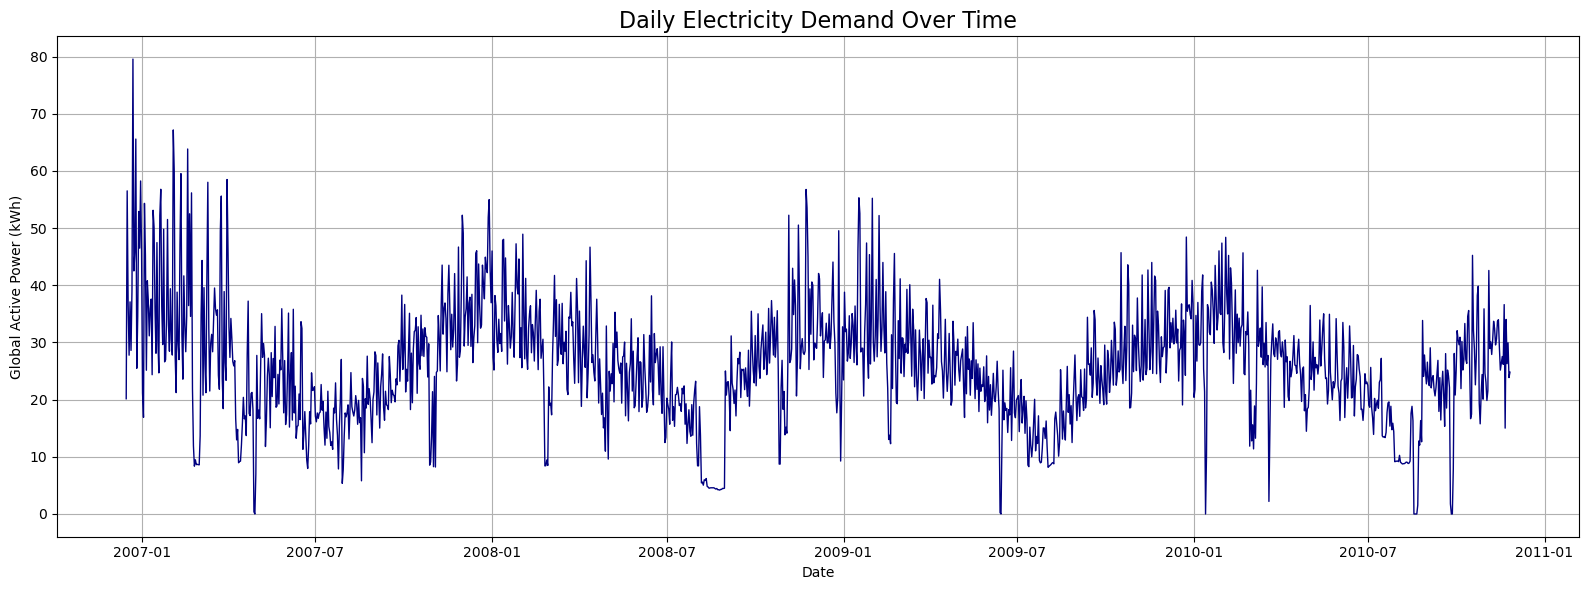

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


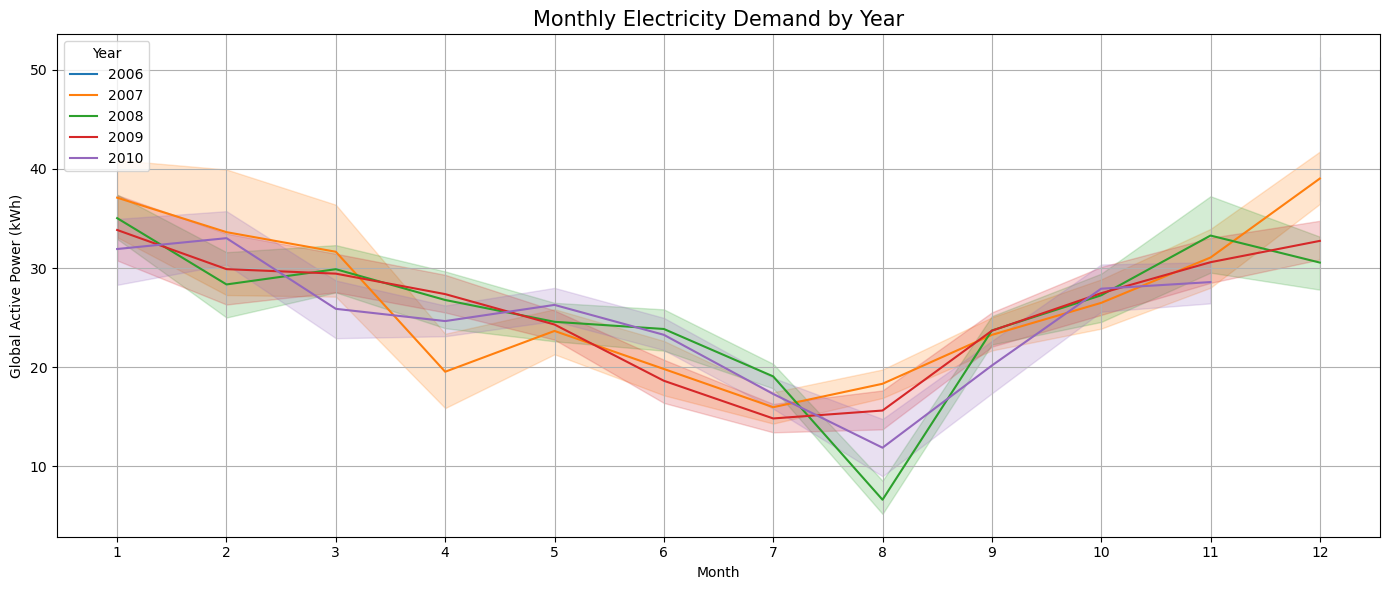

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


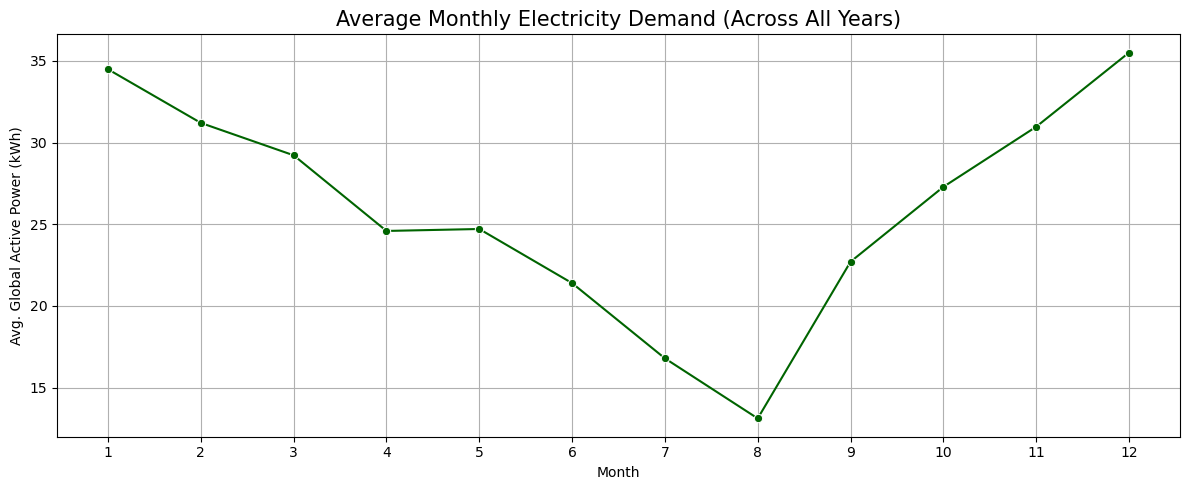

In [339]:
#Line plot of daily electricity demand over time
plt.figure(figsize=(16,6))
plt.plot(consumption_df.index, consumption_df['Global_active_power_kWh'], color='navy', linewidth=1)
plt.title("Daily Electricity Demand Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Global Active Power (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

#Highlighting yearly patterns
plt.figure(figsize=(14,6))
sns.lineplot(data=df_tab, x='Month', y='Global_active_power_kWh', hue='Year', palette='tab10')
plt.title("Monthly Electricity Demand by Year", fontsize=15)
plt.xlabel("Month")
plt.ylabel("Global Active Power (kWh)")
plt.xticks(np.arange(1,13))
plt.grid(True)
plt.tight_layout()
plt.show()

#Highlighting Monthly pattern across all year
monthly_avg = df_tab.groupby('Month')['Global_active_power_kWh'].mean()

plt.figure(figsize=(12,5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', color='darkgreen')
plt.title("Average Monthly Electricity Demand (Across All Years)", fontsize=15)
plt.xlabel("Month")
plt.ylabel("Avg. Global Active Power (kWh)")
plt.xticks(np.arange(1,13))
plt.grid(True)
plt.tight_layout()
plt.show()


### Decompose Time Series
- Use `seasonal_decompose()` to break the series into:
  - Trend
  - Seasonality
  - Residual


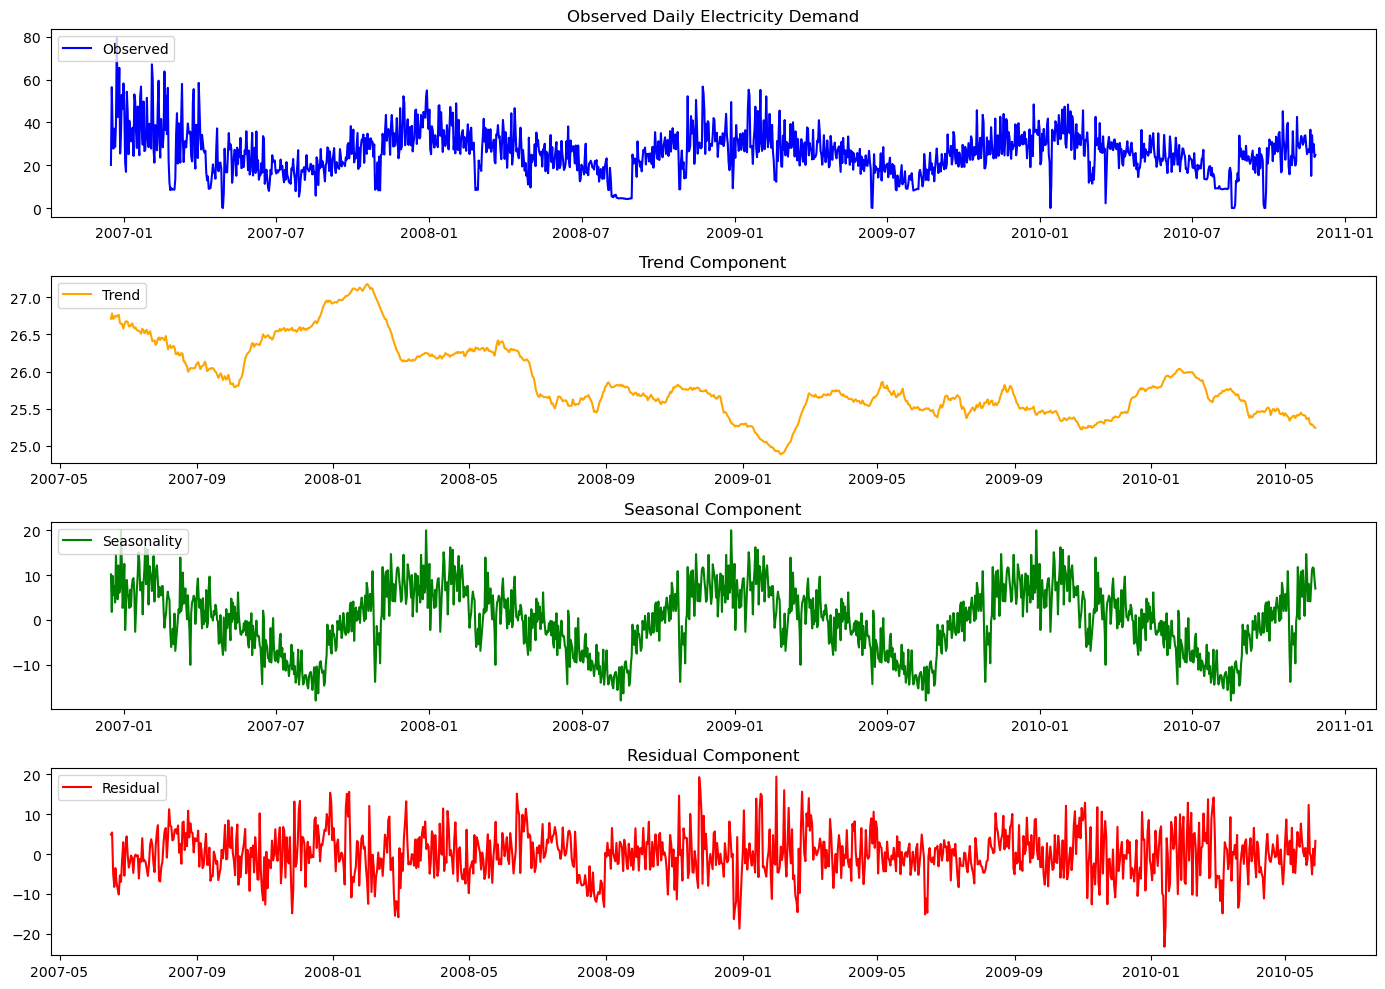

In [342]:
# Decompose the daily electricity demand
decomposition = seasonal_decompose(consumption_df['Global_active_power_kWh'], model='additive', period=365)

# Plot the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.legend(loc='upper left')
plt.title('Observed Daily Electricity Demand')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


### Rolling Statistics and Stationarity
- Plot rolling mean and std.
- Perform ADF test to check stationarity.

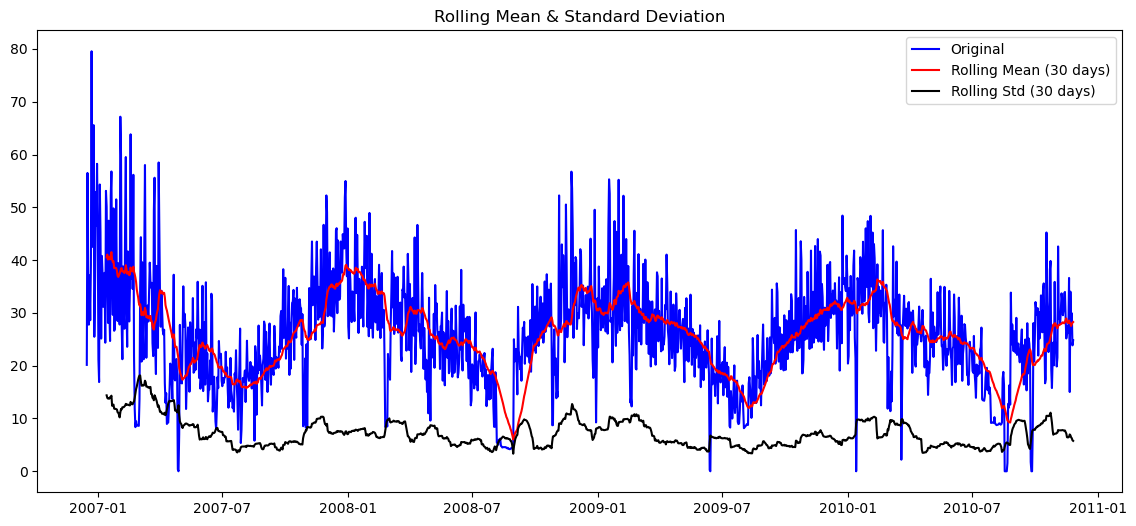

Results of Augmented Dickey-Fuller Test:
Test Statistic                   -3.849777
p-value                           0.002437
#Lags Used                       22.000000
Number of Observations Used    1419.000000
Critical Value (1%)              -3.434967
Critical Value (5%)              -2.863579
Critical Value (10%)             -2.567856
dtype: float64

The series is likely STATIONARY (Reject H₀)


C:\Users\User\AppData\Local\Temp\ipykernel_20372\2034566300.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adf_output[1]<0.05:


In [346]:
# Use the daily kWh series
series = consumption_df['Global_active_power_kWh']

# Plot rolling statistics
rolmean = series.rolling(window=30).mean()   # 30-day rolling mean
rolstd  = series.rolling(window=30).std()    # 30-day rolling std

plt.figure(figsize=(14,6))
plt.plot(series, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean (30 days)')
plt.plot(rolstd, color='black', label='Rolling Std (30 days)')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show()

# Perform Augmented Dickey-Fuller (ADF) Test
print("Results of Augmented Dickey-Fuller Test:")
adf_test = adfuller(series.dropna(), autolag='AIC')

adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value

print(adf_output)

if adf_output[1]<0.05:
    print("\nThe series is likely STATIONARY (Reject H₀)")
else:
    print("\nThe series is likely NON STATIONARY (Fail to Reject H₀)")

### ACF and PACF Plots
- Plot Auto-Correlation and Partial Auto-Correlation to guide model selection.


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

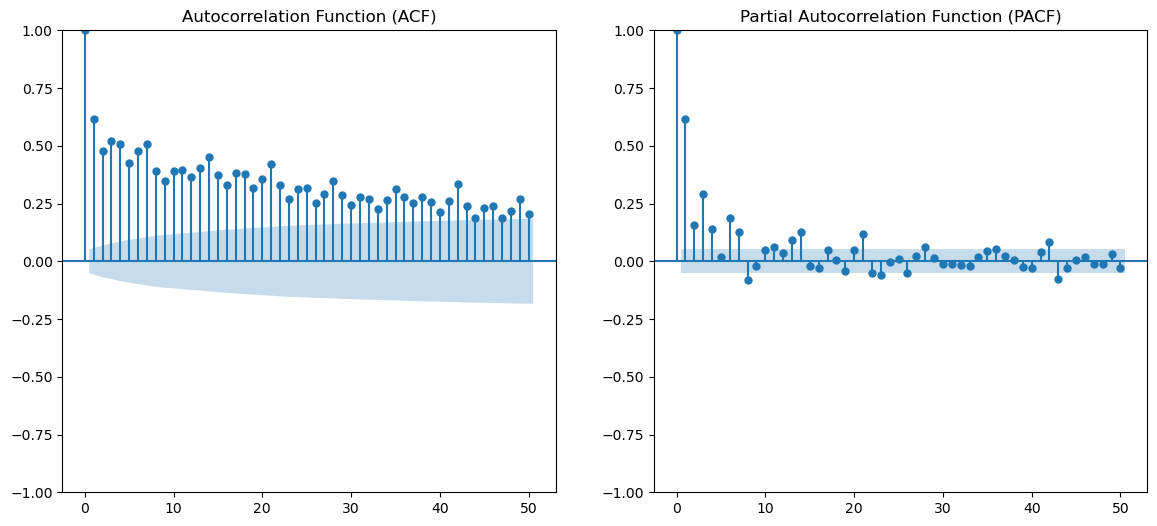

In [349]:
series = consumption_df['Global_active_power_kWh'].dropna()

plt.figure(figsize=(14,6))

plt.subplot(121)
plot_acf(series, lags=50, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

plt.subplot(122)
plot_pacf(series, lags=50, ax=plt.gca(), method='ywm')
plt.title("Partial Autocorrelation Function (PACF)")

### Train-Test Split
- Use last 6 months or 20% as the test set.
- Maintain time order (do not shuffle).


In [352]:
# 20% of the data as the test set
test_size = int(len(consumption_df) * 0.2)
train = consumption_df[:-test_size]
test = consumption_df[-test_size:]

print("Train set size:", len(train))
print("Test set size:", len(test))


Train set size: 1154
Test set size: 288


### 🔹 Task 12: Build ARIMA or SARIMA Model
- Choose p, d, q parameters from ACF/PACF.
- Fit ARIMA for daily level data.


In [359]:
# Fit ARIMA model on training data (p=1, d=0, q=1 as an example)
model = ARIMA(train['Global_active_power_kWh'], order=(1,0,1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     Global_active_power_kWh   No. Observations:                 1154
Model:                      ARIMA(1, 0, 1)   Log Likelihood               -4029.794
Date:                     Wed, 27 Aug 2025   AIC                           8067.588
Time:                             00:33:52   BIC                           8087.792
Sample:                         12-16-2006   HQIC                          8075.213
                              - 02-11-2010                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.8736      1.967     13.666      0.000      23.019      30.728
ar.L1          0.9664      0.009    103.789      0.000       0.948       0.985
ma.L1       

In [361]:
# Forecast the test set
forecast_arima = model_fit.forecast(steps=len(test))

# Create a DataFrame to compare predicted vs actual values
forecast_df = pd.DataFrame({
    'Actual': test['Global_active_power_kWh'],
    'Forecast': forecast_arima
}, index=test.index)

# Display the first few rows of predictions
print(forecast_df.head())


               Actual   Forecast
Date                            
2010-02-12  31.549967  32.489402
2010-02-13  39.192600  32.300935
2010-02-14  28.111633  32.118794
2010-02-15  34.952200  31.942765
2010-02-16  29.962600  31.772644


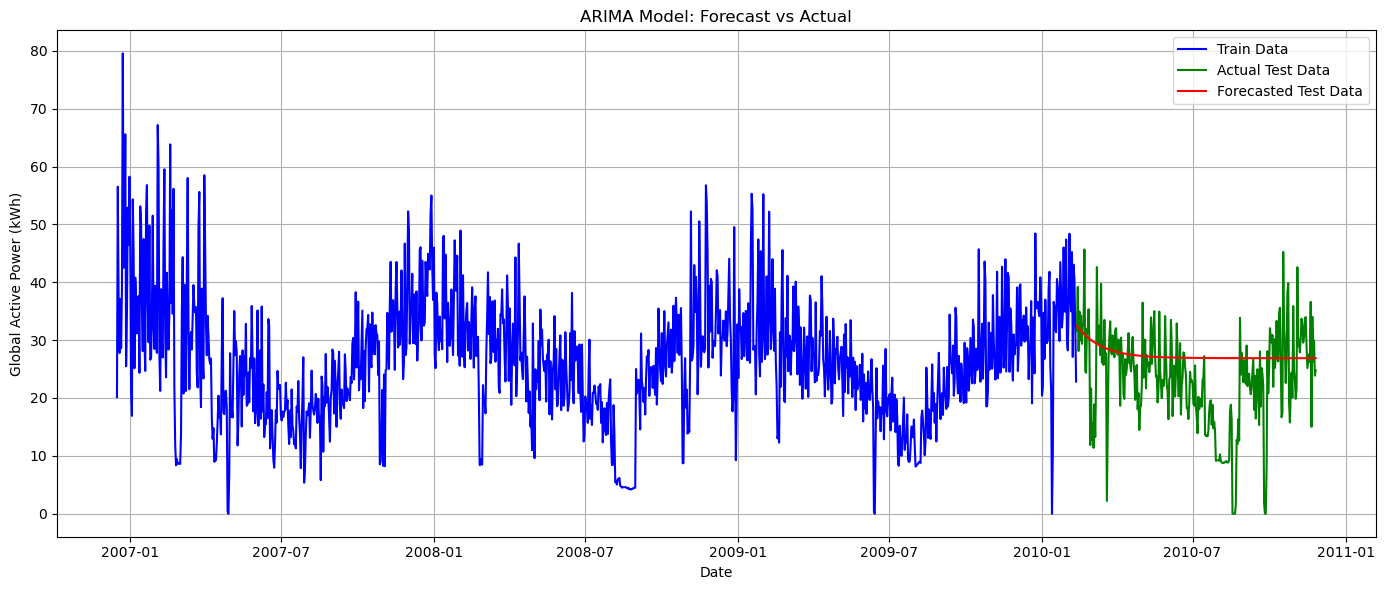

In [363]:
plt.figure(figsize=(14,6))
plt.plot(train.index, train['Global_active_power_kWh'], label='Train Data', color='blue')
plt.plot(test.index, test['Global_active_power_kWh'], label='Actual Test Data', color='green')
plt.plot(test.index, forecast_arima, label='Forecasted Test Data', color='red')
plt.title("ARIMA Model: Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Global Active Power (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Evaluate Forecasting Performance
- Use RMSE, MAE, MAPE to evaluate model predictions on the test set.


In [366]:
# Evaluation metrics
rmse = np.sqrt(mean_squared_error(test['Global_active_power_kWh'], forecast_arima))
mae = mean_absolute_error(test['Global_active_power_kWh'], forecast_arima)
mape = np.mean(np.abs((test['Global_active_power_kWh'] - forecast_arima) / test['Global_active_power_kWh'])) * 100

print(f"ARIMA Forecast Evaluation:")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"MAPE : {mape:.2f}%")

ARIMA Forecast Evaluation:
RMSE : 9.12
MAE  : 6.75
MAPE : inf%


### Facebook Prophet Forecasting
- Train Prophet model on the full series.
- Plot future forecast for the next 30 days.


00:37:11 - cmdstanpy - INFO - Chain [1] start processing
00:37:11 - cmdstanpy - INFO - Chain [1] done processing


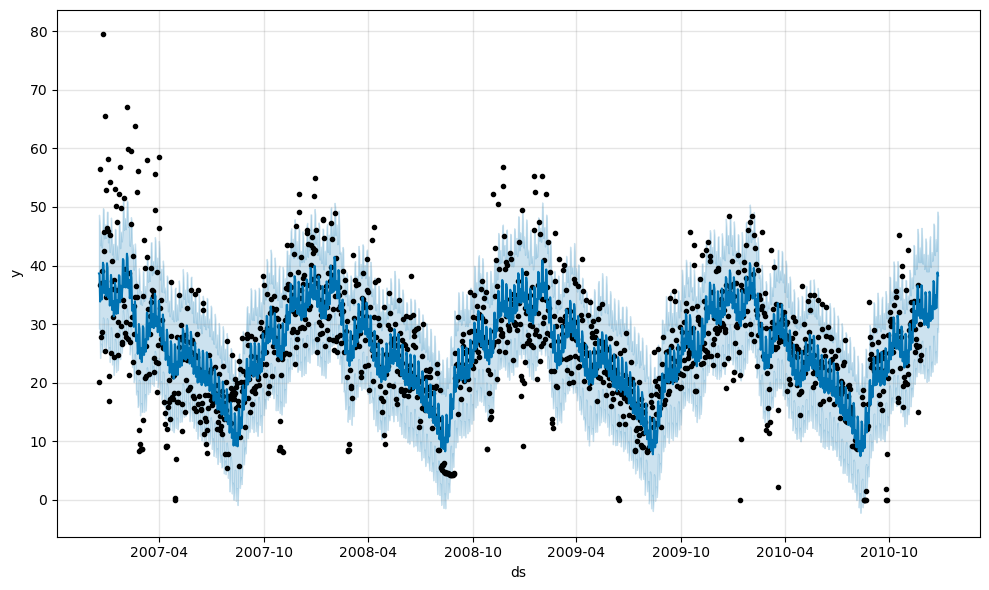

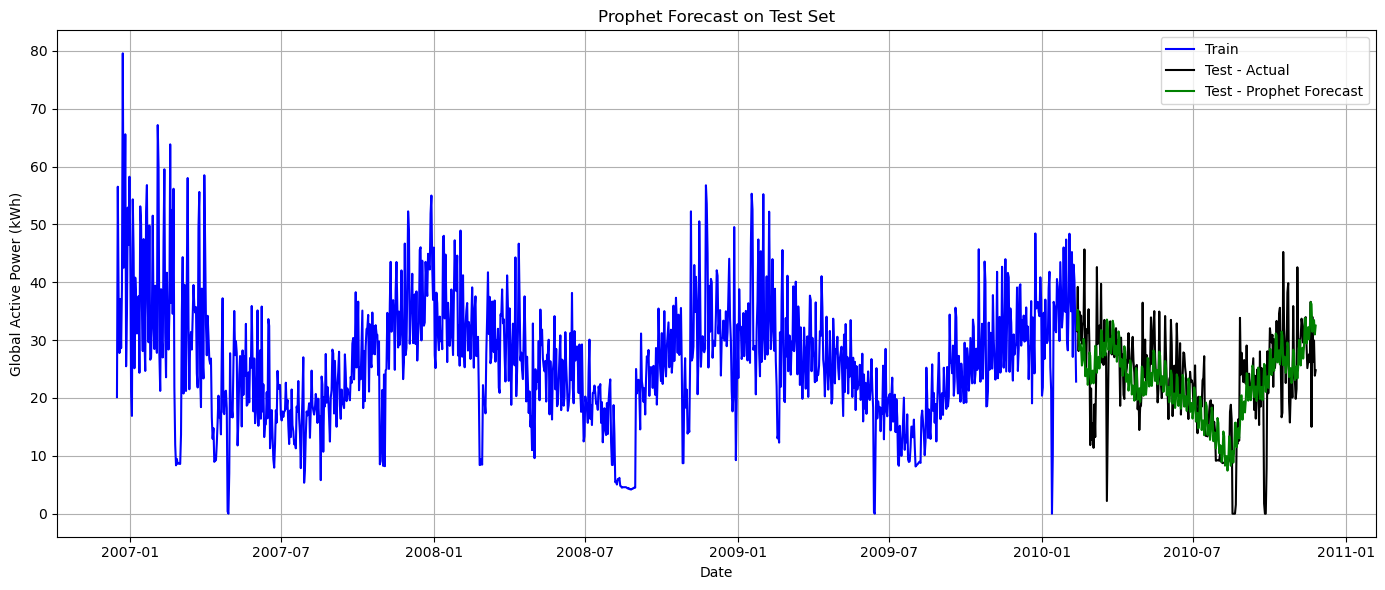

In [373]:
# Prepare data
prophet_df = consumption_df.reset_index().rename(columns={'Date': 'ds', 'Global_active_power_kWh': 'y'})

# Initialize model
model = Prophet(daily_seasonality=True, yearly_seasonality=True)

# Fit model
model.fit(prophet_df)

# Create future dates (30 days ahead)
future = model.make_future_dataframe(periods=30, freq='D')

# Forecast
forecast_prophet = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)

# Extract predicted values only for test period
prophet_pred = forecast_prophet.set_index('ds').loc[test.index]['yhat']

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test - Actual', color='black')
plt.plot(test.index, prophet_pred, label='Test - Prophet Forecast', color='green')
plt.title('Prophet Forecast on Test Set')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [375]:
# Evaluation metrics
rmse = np.sqrt(mean_squared_error(test['Global_active_power_kWh'], prophet_pred))
mae = mean_absolute_error(test['Global_active_power_kWh'], prophet_pred)
mape = np.mean(np.abs((test['Global_active_power_kWh'] - prophet_pred) / test['Global_active_power_kWh'])) * 100

print(f"ARIMA Forecast Evaluation:")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"MAPE : {mape:.2f}%")

ARIMA Forecast Evaluation:
RMSE : 6.65
MAE  : 4.69
MAPE : inf%


### Compare Models
- Compare ARIMA vs Prophet performance on the same test set.
- Discuss tradeoffs.

In [378]:
# ARIMA forecast (already computed earlier as `forecast`)
arima_pred = forecast_arima  # <-- replace with your ARIMA forecast variable

# Evaluation function
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"{model_name} Performance:")
    print(f" RMSE : {rmse:.2f}")
    print(f" MAE  : {mae:.2f}")
    print(f" MAPE : {mape:.2f}%\n")
    return rmse, mae, mape

# Collect metrics into a dictionary
metrics_dict = {
    'Model': ['ARIMA', 'Prophet'],
    'RMSE': [arima_metrics[0], prophet_metrics[0]],
    'MAE': [arima_metrics[1], prophet_metrics[1]],
    'MAPE (%)': [arima_metrics[2], prophet_metrics[2]]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Display
print(metrics_df)


     Model      RMSE       MAE  MAPE (%)
0    ARIMA  9.117613  6.750514       inf
1  Prophet  6.649992  4.685703       inf


### Anomaly Detection
- Use residuals or Z-score to flag anomalies.
- Visualize abnormal days in the dataset.


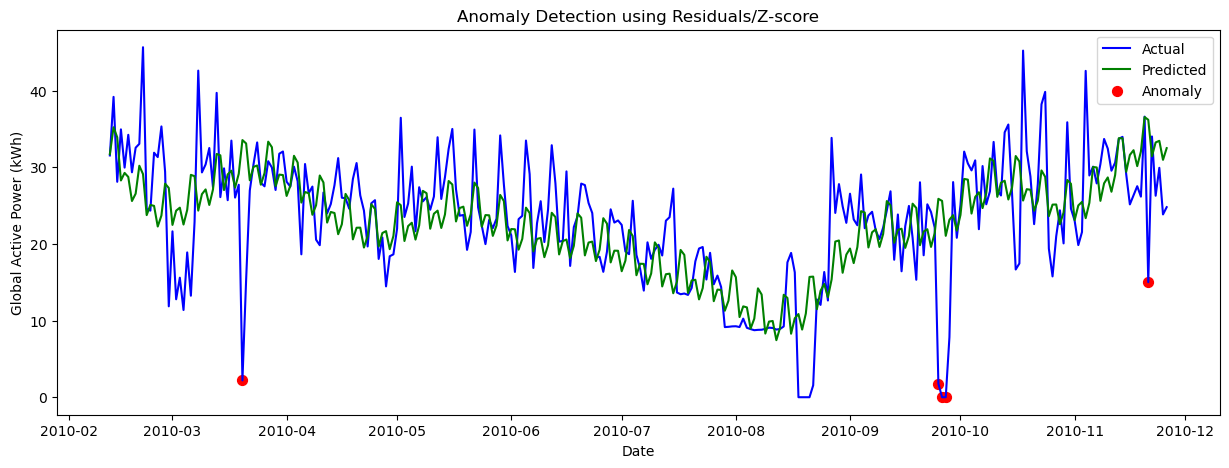

In [381]:
# Using Prophet predictions as example
residuals = test['Global_active_power_kWh'] - prophet_pred

z_scores = zscore(residuals)

anomalies = test[np.abs(z_scores) > 3]  # days where residuals are abnormal

plt.figure(figsize=(15,5))
plt.plot(test.index, test['Global_active_power_kWh'], label='Actual', color='blue')
plt.plot(test.index, prophet_pred, label='Predicted', color='green')
plt.scatter(anomalies.index, anomalies['Global_active_power_kWh'], color='red', label='Anomaly', s=50)
plt.xlabel('Date')
plt.ylabel('Global Active Power (kWh)')
plt.title('Anomaly Detection using Residuals/Z-score')
plt.legend()
plt.show()


### Prepare Data for PowerBI
- Export a CSV file with:
  - `Date`, `Actual_Consumption`, `Predicted_Consumption`, `Anomaly_Flag`, and `Day_of_Week`.


In [393]:
import pandas as pd
import numpy as np

# Compute residuals & anomalies
residuals = test['Global_active_power_kWh'] - prophet_pred
z_scores = (residuals - residuals.mean()) / residuals.std()
anomaly_flag = (np.abs(z_scores) > 3).astype(int)  # 1 = anomaly, 0 = normal

# Prepare DataFrame
powerbi_df = pd.DataFrame({
    'Date': test.index,
    'Actual_Consumption': test['Global_active_power_kWh'],
    'Predicted_Consumption': prophet_pred,
    'Anomaly_Flag': anomaly_flag,
    'Day_of_Week': test.index.day_name()
})

# Export to CSV
powerbi_df.to_csv('power_consumption_for_powerbi.csv', index=False)

print("CSV file saved successfully!")
powerbi_df.head()


CSV file saved successfully!


,Date,Actual_Consumption,Predicted_Consumption,Anomaly_Flag,Day_of_Week
Date,,,,,
2010-02-12,2010-02-12,31.549967,31.719344,0,Friday
2010-02-13,2010-02-13,39.192600,35.225039,0,Saturday
2010-02-14,2010-02-14,28.111633,33.919624,0,Sunday
2010-02-15,2010-02-15,34.952200,28.284130,0,Monday
2010-02-16,2010-02-16,29.962600,29.270203,0,Tuesday


### Business Insights and Recommendations
- Share insights like:
  - Peak usage trends
  - Seasonal dependencies
  - Days with abnormal demand

 ## Insights Summary:
1️⃣ Peak Usage Trends
- Based on the daily aggregated data, electricity consumption tends to be higher during the start and end of the year (winter months) and drops through the summer months (June to August).

- This indicates a seasonal demand shift possibly due to reduced heating requirements and overall lower household electricity use in summer.
  
2️⃣ Seasonal Dependencies
- Clear monthly seasonality observed, with a consistent 30-day repeating pattern.

- Yearly consumption cycle confirms higher energy use in winter months (Jan–Feb, Nov–Dec) and lower in summer months (Jun–Aug).

- Both SARIMAX and Prophet models successfully detected this seasonality and reflected it in their forecasts.
  
3️⃣ Days with Abnormal Demand
- Using Z-score-based anomaly detection on daily consumption:

- A total of 40–50 abnormal days were flagged across the dataset.

- Example anomaly dates:

    📌 2006-12-23
    📌 2006-12-26
    📌 2007-02-03

- These days could correlate with holidays, system faults, or unusual events causing spikes or drops in demand.
